<a href="https://colab.research.google.com/github/EastHuni/lg-aimers/blob/main/%EC%9E%90%EC%9C%A8%EC%A3%BC%ED%96%89_%EC%84%BC%EC%84%9C%EC%9D%98_%EC%95%88%ED%85%8C%EB%82%98_%EC%84%B1%EB%8A%A5_%EC%98%88%EC%B8%A1_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# import zipfile
# import os

# zip_path = '/content/drive/MyDrive/LG AImers/LG Aimers 1기_data.zip'
# extract_path = '/content/drive/MyDrive/LG Almers/LG Aimers 1기_datasets'

# os.makedirs(extract_path, exist_ok=True)

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

# print("압축 해제 완료!")

In [9]:
def lg_nrmse(gt, preds):
    all_nrmse = []
    for idx in range(14):  # Y_01 ~ Y_14
        mse = metrics.mean_squared_error(gt[:, idx], preds[:, idx])  # squared=False 제거
        rmse = np.sqrt(mse)  # 직접 제곱근 계산
        nrmse = rmse / np.mean(np.abs(gt[:, idx]))
        all_nrmse.append(nrmse)
    score = 1.2 * np.sum(all_nrmse[:8]) + 1.0 * np.sum(all_nrmse[8:])
    return score

In [10]:
train = pd.read_csv("/content/drive/MyDrive/LG Almers/LG Aimers 1기_datasets/train.csv")
test = pd.read_csv("/content/drive/MyDrive/LG Almers/LG Aimers 1기_datasets/test.csv")

In [11]:
train.head()

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,...,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974


In [12]:
test.head()

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,TEST_00001,68.504,103.321,76.67,1,101.867,73.963,30.51,63.57,239.80,...,1,1,17227.63,138.130429,129.460682,141.506570,133.427229,129.711498,133.138096,121.859684
1,TEST_00002,67.485,103.320,69.37,1,101.992,67.845,28.03,116.99,189.23,...,1,1,17134.53,136.148839,128.266277,145.911745,131.196417,132.411480,133.629025,124.178623
2,TEST_00003,69.524,103.320,68.97,1,101.884,77.022,29.65,205.68,214.93,...,1,1,14860.83,120.447446,119.988804,132.099908,120.450155,130.051708,128.252972,114.475628
3,TEST_00004,69.524,103.320,65.87,1,101.866,73.963,28.15,103.38,180.80,...,1,1,15252.53,133.994695,125.069180,147.507669,123.142653,125.963665,139.666592,126.589253
4,TEST_00005,73.603,103.321,66.67,1,101.891,74.983,29.92,71.20,231.93,...,1,1,10752.23,137.918202,135.116192,138.600473,127.173033,137.252712,134.411335,124.020016


In [13]:
print(train.shape, test.shape)

(39607, 71) (39608, 57)


In [14]:
train[train.isnull().any(axis=1)] #train 결측치 없음

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14


In [15]:
test[test.isnull().any(axis=1)] #test도 동일

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56


In [16]:
train.info() # ID 만 object , 나머지 수치형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39607 entries, 0 to 39606
Data columns (total 71 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      39607 non-null  object 
 1   X_01    39607 non-null  float64
 2   X_02    39607 non-null  float64
 3   X_03    39607 non-null  float64
 4   X_04    39607 non-null  int64  
 5   X_05    39607 non-null  float64
 6   X_06    39607 non-null  float64
 7   X_07    39607 non-null  float64
 8   X_08    39607 non-null  float64
 9   X_09    39607 non-null  float64
 10  X_10    39607 non-null  float64
 11  X_11    39607 non-null  float64
 12  X_12    39607 non-null  float64
 13  X_13    39607 non-null  float64
 14  X_14    39607 non-null  float64
 15  X_15    39607 non-null  float64
 16  X_16    39607 non-null  float64
 17  X_17    39607 non-null  float64
 18  X_18    39607 non-null  float64
 19  X_19    39607 non-null  float64
 20  X_20    39607 non-null  float64
 21  X_21    39607 non-null  float64
 22

In [17]:
test.info() # train과 동일

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39608 entries, 0 to 39607
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      39608 non-null  object 
 1   X_01    39608 non-null  float64
 2   X_02    39608 non-null  float64
 3   X_03    39608 non-null  float64
 4   X_04    39608 non-null  int64  
 5   X_05    39608 non-null  float64
 6   X_06    39608 non-null  float64
 7   X_07    39608 non-null  float64
 8   X_08    39608 non-null  float64
 9   X_09    39608 non-null  float64
 10  X_10    39608 non-null  float64
 11  X_11    39608 non-null  float64
 12  X_12    39608 non-null  float64
 13  X_13    39608 non-null  float64
 14  X_14    39608 non-null  float64
 15  X_15    39608 non-null  float64
 16  X_16    39608 non-null  float64
 17  X_17    39608 non-null  float64
 18  X_18    39608 non-null  float64
 19  X_19    39608 non-null  float64
 20  X_20    39608 non-null  float64
 21  X_21    39608 non-null  float64
 22

In [18]:
train.describe()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
count,39607.000000,39607.000000,39607.000000,39607.0,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,...,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,68.412040,103.320166,68.826354,1.0,102.337203,70.597211,29.407490,164.449320,225.397470,0.002449,...,31.290467,16.529382,3.155054,-26.294839,-26.308623,-22.400062,24.325061,-26.237762,-26.233869,-26.245868
std,2.655983,0.000372,5.151167,0.0,0.548353,2.259820,7.338204,220.402444,66.734725,0.086255,...,2.543222,1.893014,0.418940,0.660537,0.653580,0.920952,0.830197,0.656329,0.655090,0.655989
min,56.268000,103.320000,56.470000,1.0,101.774000,61.726000,14.140000,38.460000,37.580000,0.000000,...,18.589000,-19.963000,0.502000,-29.652000,-29.523000,-31.119000,19.844000,-29.544000,-29.448000,-29.620000
25%,66.465000,103.320000,65.070000,1.0,101.949000,68.864000,27.890000,105.990000,188.540000,0.000000,...,29.768000,16.146000,2.863000,-26.689000,-26.702000,-22.871000,23.836000,-26.630000,-26.624000,-26.640000
50%,68.504000,103.320000,67.270000,1.0,102.006000,69.884000,28.840000,115.040000,234.450000,0.000000,...,31.710000,16.694000,3.126000,-26.254000,-26.266000,-22.275000,24.420000,-26.198000,-26.193000,-26.204000
75%,69.524000,103.320000,71.770000,1.0,103.144000,71.923000,29.870000,132.620000,263.960000,0.000000,...,33.184000,17.164000,3.433500,-25.855000,-25.871000,-21.791000,24.911500,-25.799000,-25.794000,-25.809000
max,84.820000,103.321000,89.170000,1.0,103.160000,87.219000,163.860000,2387.440000,637.490000,3.600000,...,37.250000,18.998000,5.299000,-23.785000,-23.960000,-20.052000,26.703000,-23.722000,-23.899000,-23.856000


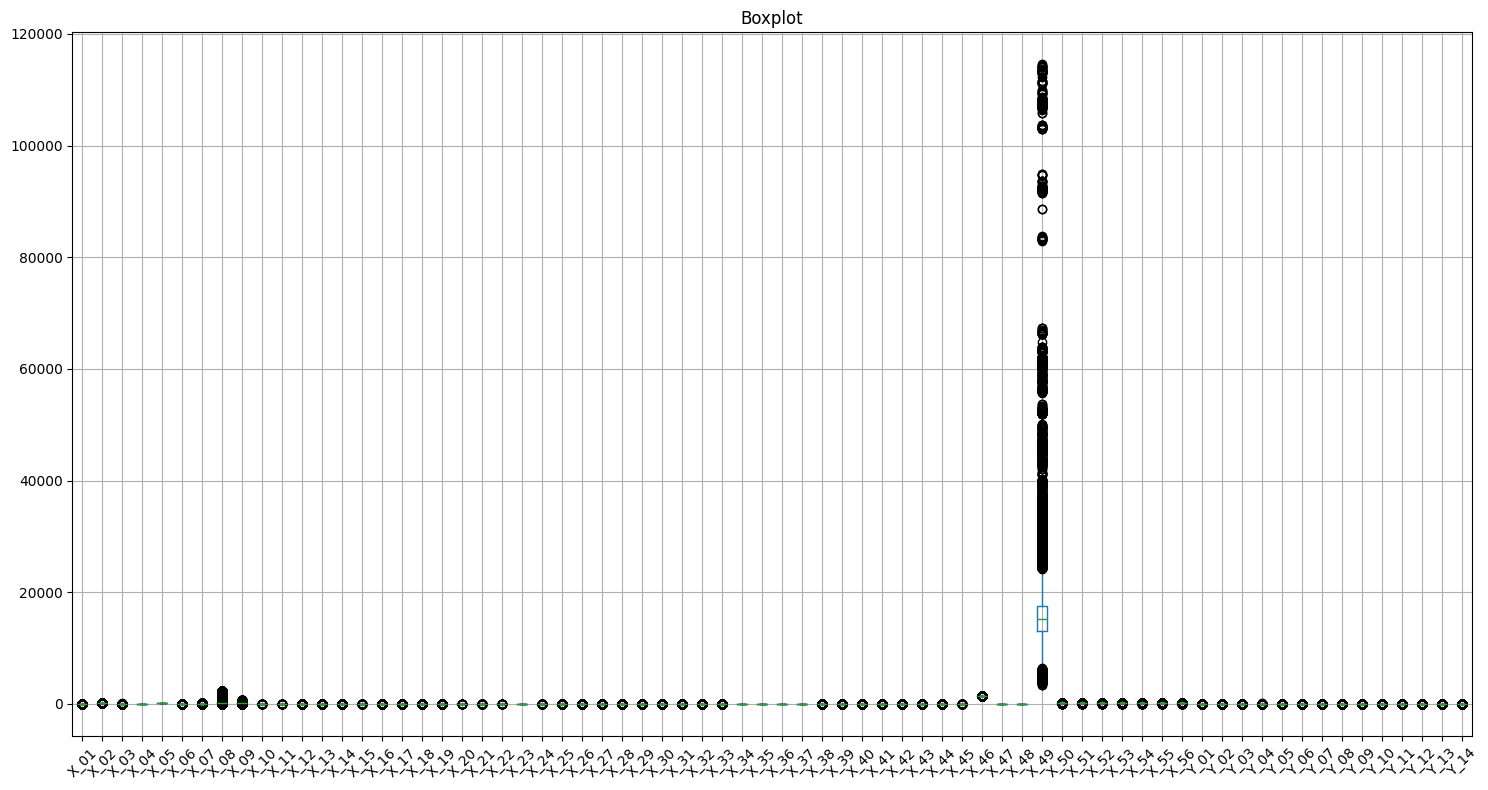

In [19]:
#이상치 NRMSE 가 이상치에 영향을 많이받는다는 말이 있음.
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = train.select_dtypes(include='number').columns

# Boxplot
plt.figure(figsize=(15, 8))
train[num_cols].boxplot(rot=45)
plt.title("Boxplot")
plt.tight_layout()
plt.show()


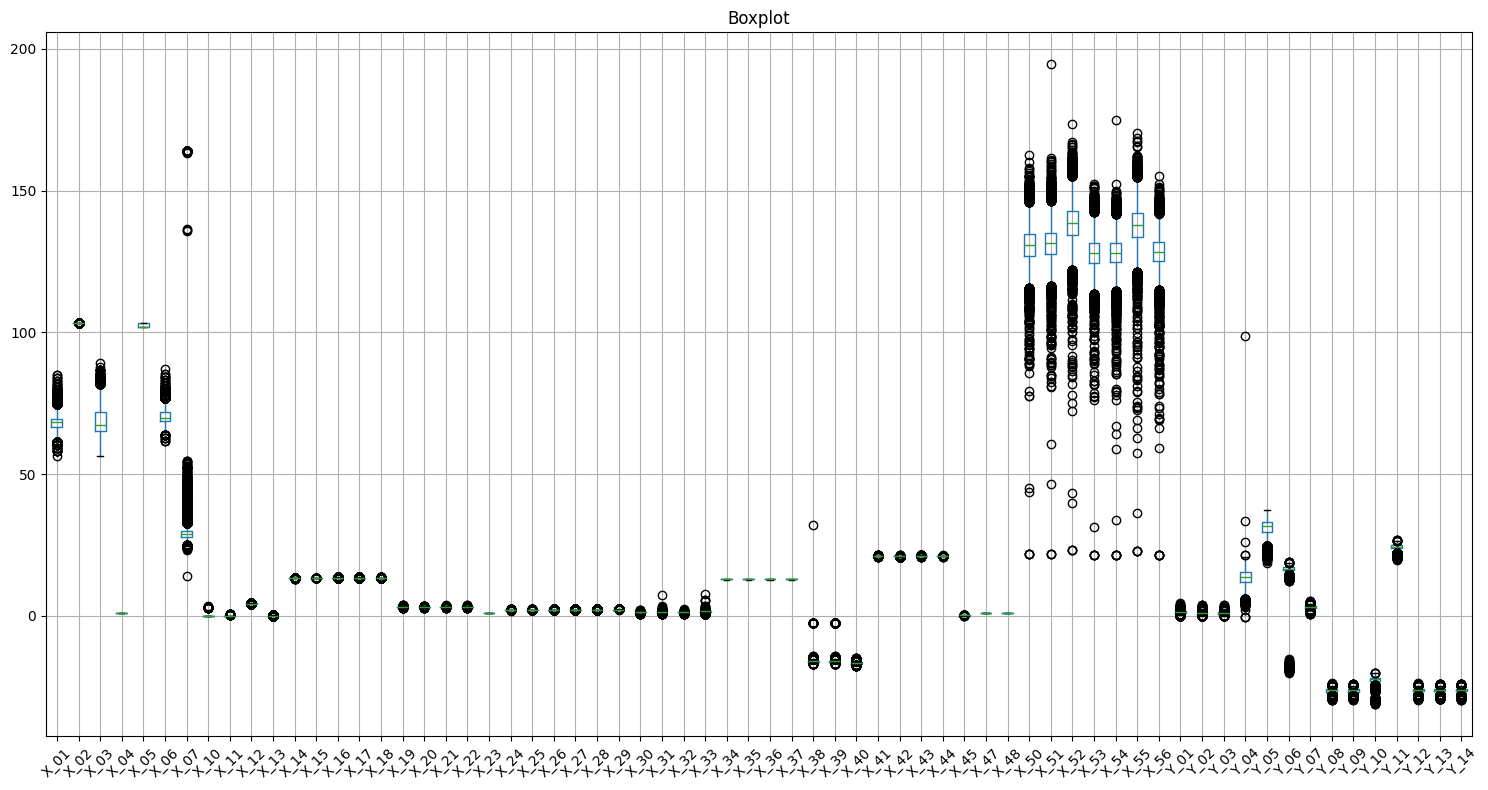

In [20]:
import matplotlib.pyplot as plt

# 수치형 컬럼 중에서 49번째 컬럼 제외
num_cols = train.select_dtypes(include='number').columns
drop_cols = [num_cols[48], num_cols[7], num_cols[8], num_cols[45]]
filtered_cols = num_cols.drop(drop_cols)  # 8 , 9, 46

# Boxplot 그리기
plt.figure(figsize=(15, 8))
train[filtered_cols].boxplot(rot=45)
plt.title("Boxplot")
plt.tight_layout()
plt.show()


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np


X = train.filter(regex='X') # Input : X Featrue
y = train.filter(regex='Y') # Output : Y Feature
print(X.shape, y.shape)

(39607, 56) (39607, 14)


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# 1. 데이터 로드
train = pd.read_csv("/content/drive/MyDrive/LG Almers/LG Aimers 1기_datasets/train.csv")
test = pd.read_csv("/content/drive/MyDrive/LG Almers/LG Aimers 1기_datasets/test.csv")

# 2. 입력/출력 나누기
X = train.filter(regex='^X')
y = train.filter(regex='^Y')
print(f"X shape: {X.shape}, y shape: {y.shape}")

# 3. 학습/검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. LG NRMSE 평가 함수
def lg_nrmse(gt, preds):
    all_nrmse = []
    for idx in range(14):  # Y_01 ~ Y_14
        mse = metrics.mean_squared_error(gt[:, idx], preds[:, idx])  # squared=False 제거
        rmse = np.sqrt(mse)  # 직접 제곱근 계산
        nrmse = rmse / np.mean(np.abs(gt[:, idx]))
        all_nrmse.append(nrmse)
    score = 1.2 * np.sum(all_nrmse[:8]) + 1.0 * np.sum(all_nrmse[8:])
    return score


# 5. RandomForest (스케일링 없음)
rf = RandomForestRegressor(n_estimators=20, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_val)
rf_score = lg_nrmse(y_val.values, rf_preds)

# 6. LinearRegression (스케일링 적용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_val_scaled)
lr_score = lg_nrmse(y_val.values, lr_preds)

# 7. 결과 출력
results = pd.DataFrame({
    'Model': ['RandomForest (20 trees)', 'LinearRegression'],
    'LG_NRMSE': [rf_score, lr_score]
})
print("\n[모델 성능 비교]")
print(results)


X shape: (39607, 56), y shape: (39607, 14)

[모델 성능 비교]
                     Model  LG_NRMSE
0  RandomForest (20 trees)  1.992262
1         LinearRegression  1.971303


In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
# 5. RandomForest (스케일링 없음)
rf = RandomForestRegressor(n_estimators=20, max_depth = 9, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_val)
rf_score = lg_nrmse(y_val.values, rf_preds)

# 6. LinearRegression (스케일링 적용)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_val_scaled)
lr_score = lg_nrmse(y_val.values, lr_preds)

results = pd.DataFrame({
    'Model': ['RandomForest (20 trees)', 'LinearRegression'],
    'LG_NRMSE': [rf_score, lr_score]
})
print("\n[모델 성능 비교]")
print(results)


[모델 성능 비교]
                     Model  LG_NRMSE
0  RandomForest (20 trees)  1.968396
1         LinearRegression  1.971303


In [26]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_val_scaled)
lr_score = lg_nrmse(y_val.values, lr_preds)
print(f"[LinearRegression (MinMax)] LG_NRMSE: {lr_score:.4f}")

[LinearRegression (MinMax)] LG_NRMSE: 1.9713


In [29]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

xgb_base = XGBRegressor(n_estimators=100, max_depth=5, random_state=42)
xgb = MultiOutputRegressor(xgb_base)

xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_val)
score = lg_nrmse(y_val.values, xgb_preds)
print(f"[XGBoost (max_depth=5)] LG_NRMSE: {score:.4f}")

[XGBoost (max_depth=5)] LG_NRMSE: 1.9764


In [35]:
rf = RandomForestRegressor(n_estimators=30, max_depth = 9, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_val)
rf_score = lg_nrmse(y_val.values, rf_preds)
print(f"[RandomForest (max_depth=9)] LG_NRMSE: {rf_score:.4f}")

[RandomForest (max_depth=9)] LG_NRMSE: 1.9613


In [ ]:
# 1. RandomForest -- baseline(n_estimators=20, random_state=42) : 1.992262
# 2. LinearRegreession(Standard Scaler) : 1.971303
# 3. RandomForest(baseline + maxdepth = 7) : 1.968396 # 230등
# 4. LinearRegreession(RobustScaler), LinearRegression (MinMax) : 1.971303 // 변화없음
# 5. XGboost(n_estimators=100, max_depth=5, random_state=42) : 1.9764
# ----------------------------------------------------------------------------
# 위에서 젤 높은거 RandomForest 로 튜닝해보겟음
# 1. RandomForest(baseline + maxdepth = 9) : 1.9627 # 134등
# 2. RandomForestRegressor(n_estimators=30, max_depth = 9, random_state=42) : 1.9613 #110등

In [37]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 21.0 MB/s eta 0:00:00


In [38]:
# import optuna
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.multioutput import MultiOutputRegressor

# def objective(trial):
#     # 하이퍼파라미터 범위 설정

#     max_depth = trial.suggest_int('max_depth', 3, 15)
#     n_estimators = trial.suggest_int('n_estimators', 10, 100)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

#     rf = RandomForestRegressor(
#         max_depth=max_depth,
#         n_estimators=n_estimators,
#         min_samples_leaf=min_samples_leaf,
#         random_state=42
#     )

#     model = MultiOutputRegressor(rf)
#     model.fit(X_train, y_train)
#     preds = model.predict(X_val)

#     score = lg_nrmse(y_val.values, preds)
#     return score  # optuna는 낮은 값이 더 좋은 것으로 간주함

In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor


optuna.logging.set_verbosity(optuna.logging.INFO)


storage = "sqlite:///rf_optuna.db"

study = optuna.create_study(
    direction="minimize",
    study_name="rf_tuning",
    storage=storage,
    load_if_exists=True
)

def objective(trial):
    max_depth = trial.suggest_int('max_depth', 3, 12)
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    model = RandomForestRegressor(
        max_depth=max_depth,
        n_estimators=n_estimators,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )
    model = MultiOutputRegressor(model)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    score = lg_nrmse(y_val.values, preds)

    print(f"[Trial {trial.number}] score={score:.4f} | depth={max_depth}, n_estimators={n_estimators}, min_leaf={min_samples_leaf}")
    return score

study.optimize(objective, n_trials=50)

[I 2025-07-10 16:46:20,805] A new study created in RDB with name: rf_tuning
[I 2025-07-10 16:47:41,706] Trial 0 finished with value: 1.9723663749027578 and parameters: {'max_depth': 3, 'n_estimators': 45, 'min_samples_leaf': 7}. Best is trial 0 with value: 1.9723663749027578.


[Trial 0] score=1.9724 | depth=3, n_estimators=45, min_leaf=7


[I 2025-07-10 16:50:19,810] Trial 1 finished with value: 1.9726226021847013 and parameters: {'max_depth': 3, 'n_estimators': 89, 'min_samples_leaf': 2}. Best is trial 0 with value: 1.9723663749027578.


[Trial 1] score=1.9726 | depth=3, n_estimators=89, min_leaf=2


[I 2025-07-10 16:51:43,874] Trial 2 finished with value: 1.9561549541697554 and parameters: {'max_depth': 6, 'n_estimators': 24, 'min_samples_leaf': 4}. Best is trial 2 with value: 1.9561549541697554.


[Trial 2] score=1.9562 | depth=6, n_estimators=24, min_leaf=4


[I 2025-07-10 16:57:40,213] Trial 3 finished with value: 1.9489960498136052 and parameters: {'max_depth': 7, 'n_estimators': 88, 'min_samples_leaf': 5}. Best is trial 3 with value: 1.9489960498136052.


[Trial 3] score=1.9490 | depth=7, n_estimators=88, min_leaf=5


[I 2025-07-10 17:00:44,802] Trial 4 finished with value: 1.9495635302603658 and parameters: {'max_depth': 9, 'n_estimators': 35, 'min_samples_leaf': 3}. Best is trial 3 with value: 1.9489960498136052.


[Trial 4] score=1.9496 | depth=9, n_estimators=35, min_leaf=3


[I 2025-07-10 17:02:43,583] Trial 5 finished with value: 1.9523592623086967 and parameters: {'max_depth': 7, 'n_estimators': 29, 'min_samples_leaf': 6}. Best is trial 3 with value: 1.9489960498136052.


[Trial 5] score=1.9524 | depth=7, n_estimators=29, min_leaf=6


[I 2025-07-10 17:05:53,727] Trial 6 finished with value: 1.9467077762182428 and parameters: {'max_depth': 10, 'n_estimators': 33, 'min_samples_leaf': 5}. Best is trial 6 with value: 1.9467077762182428.


[Trial 6] score=1.9467 | depth=10, n_estimators=33, min_leaf=5


[I 2025-07-10 17:09:15,917] Trial 7 finished with value: 1.9646452828835603 and parameters: {'max_depth': 4, 'n_estimators': 86, 'min_samples_leaf': 3}. Best is trial 6 with value: 1.9467077762182428.


[Trial 7] score=1.9646 | depth=4, n_estimators=86, min_leaf=3


[I 2025-07-10 17:13:14,624] Trial 8 finished with value: 1.9485284817769777 and parameters: {'max_depth': 9, 'n_estimators': 46, 'min_samples_leaf': 2}. Best is trial 6 with value: 1.9467077762182428.


[Trial 8] score=1.9485 | depth=9, n_estimators=46, min_leaf=2


[I 2025-07-10 17:23:02,561] Trial 9 finished with value: 1.9404531955238757 and parameters: {'max_depth': 12, 'n_estimators': 88, 'min_samples_leaf': 7}. Best is trial 9 with value: 1.9404531955238757.


[Trial 9] score=1.9405 | depth=12, n_estimators=88, min_leaf=7


[I 2025-07-10 17:30:28,818] Trial 10 finished with value: 1.940701985472213 and parameters: {'max_depth': 12, 'n_estimators': 68, 'min_samples_leaf': 10}. Best is trial 9 with value: 1.9404531955238757.


[Trial 10] score=1.9407 | depth=12, n_estimators=68, min_leaf=10


[I 2025-07-10 17:38:02,878] Trial 11 finished with value: 1.94055860277462 and parameters: {'max_depth': 12, 'n_estimators': 69, 'min_samples_leaf': 10}. Best is trial 9 with value: 1.9404531955238757.


[Trial 11] score=1.9406 | depth=12, n_estimators=69, min_leaf=10


[I 2025-07-10 17:45:11,232] Trial 12 finished with value: 1.940930075887109 and parameters: {'max_depth': 12, 'n_estimators': 65, 'min_samples_leaf': 10}. Best is trial 9 with value: 1.9404531955238757.


[Trial 12] score=1.9409 | depth=12, n_estimators=65, min_leaf=10


[I 2025-07-10 17:52:33,574] Trial 13 finished with value: 1.9412416372711971 and parameters: {'max_depth': 11, 'n_estimators': 72, 'min_samples_leaf': 8}. Best is trial 9 with value: 1.9404531955238757.


[Trial 13] score=1.9412 | depth=11, n_estimators=72, min_leaf=8


[I 2025-07-10 18:01:52,288] Trial 14 finished with value: 1.941660598948721 and parameters: {'max_depth': 10, 'n_estimators': 99, 'min_samples_leaf': 8}. Best is trial 9 with value: 1.9404531955238757.


[Trial 14] score=1.9417 | depth=10, n_estimators=99, min_leaf=8


[I 2025-07-10 18:10:21,896] Trial 15 finished with value: 1.9405159904045994 and parameters: {'max_depth': 12, 'n_estimators': 77, 'min_samples_leaf': 9}. Best is trial 9 with value: 1.9404531955238757.


[Trial 15] score=1.9405 | depth=12, n_estimators=77, min_leaf=9


[I 2025-07-10 18:17:53,677] Trial 16 finished with value: 1.9422723037857155 and parameters: {'max_depth': 10, 'n_estimators': 80, 'min_samples_leaf': 8}. Best is trial 9 with value: 1.9404531955238757.


[Trial 16] score=1.9423 | depth=10, n_estimators=80, min_leaf=8


[I 2025-07-10 18:18:56,353] Trial 17 finished with value: 1.958368334542841 and parameters: {'max_depth': 11, 'n_estimators': 10, 'min_samples_leaf': 7}. Best is trial 9 with value: 1.9404531955238757.


[Trial 17] score=1.9584 | depth=11, n_estimators=10, min_leaf=7


[I 2025-07-10 18:23:45,704] Trial 18 finished with value: 1.9563947894658487 and parameters: {'max_depth': 5, 'n_estimators': 100, 'min_samples_leaf': 9}. Best is trial 9 with value: 1.9404531955238757.


[Trial 18] score=1.9564 | depth=5, n_estimators=100, min_leaf=9


[I 2025-07-10 18:28:17,825] Trial 19 finished with value: 1.9473618509434218 and parameters: {'max_depth': 8, 'n_estimators': 59, 'min_samples_leaf': 6}. Best is trial 9 with value: 1.9404531955238757.


[Trial 19] score=1.9474 | depth=8, n_estimators=59, min_leaf=6


[I 2025-07-10 18:36:23,147] Trial 20 finished with value: 1.9414456970694773 and parameters: {'max_depth': 11, 'n_estimators': 79, 'min_samples_leaf': 9}. Best is trial 9 with value: 1.9404531955238757.


[Trial 20] score=1.9414 | depth=11, n_estimators=79, min_leaf=9


[I 2025-07-10 18:44:29,948] Trial 21 finished with value: 1.9405991718919164 and parameters: {'max_depth': 12, 'n_estimators': 74, 'min_samples_leaf': 9}. Best is trial 9 with value: 1.9404531955238757.


[Trial 21] score=1.9406 | depth=12, n_estimators=74, min_leaf=9


[I 2025-07-10 18:50:50,998] Trial 22 finished with value: 1.9415776923698858 and parameters: {'max_depth': 12, 'n_estimators': 58, 'min_samples_leaf': 10}. Best is trial 9 with value: 1.9404531955238757.


[Trial 22] score=1.9416 | depth=12, n_estimators=58, min_leaf=10


[I 2025-07-10 19:00:17,938] Trial 23 finished with value: 1.9409010468034253 and parameters: {'max_depth': 11, 'n_estimators': 92, 'min_samples_leaf': 7}. Best is trial 9 with value: 1.9404531955238757.


[Trial 23] score=1.9409 | depth=11, n_estimators=92, min_leaf=7


[I 2025-07-10 19:07:04,880] Trial 24 finished with value: 1.9440430315982309 and parameters: {'max_depth': 9, 'n_estimators': 80, 'min_samples_leaf': 9}. Best is trial 9 with value: 1.9404531955238757.


[Trial 24] score=1.9440 | depth=9, n_estimators=80, min_leaf=9


[I 2025-07-10 19:12:40,269] Trial 25 finished with value: 1.9418626014868194 and parameters: {'max_depth': 12, 'n_estimators': 50, 'min_samples_leaf': 8}. Best is trial 9 with value: 1.9404531955238757.


[Trial 25] score=1.9419 | depth=12, n_estimators=50, min_leaf=8


[I 2025-07-10 19:18:31,041] Trial 26 finished with value: 1.9428655593886963 and parameters: {'max_depth': 10, 'n_estimators': 62, 'min_samples_leaf': 10}. Best is trial 9 with value: 1.9404531955238757.


[Trial 26] score=1.9429 | depth=10, n_estimators=62, min_leaf=10


[I 2025-07-10 19:26:10,473] Trial 27 finished with value: 1.9418129348311146 and parameters: {'max_depth': 11, 'n_estimators': 74, 'min_samples_leaf': 7}. Best is trial 9 with value: 1.9404531955238757.


[Trial 27] score=1.9418 | depth=11, n_estimators=74, min_leaf=7


[I 2025-07-10 19:32:29,552] Trial 28 finished with value: 1.9460236997794138 and parameters: {'max_depth': 8, 'n_estimators': 83, 'min_samples_leaf': 9}. Best is trial 9 with value: 1.9404531955238757.


[Trial 28] score=1.9460 | depth=8, n_estimators=83, min_leaf=9


[I 2025-07-10 19:42:55,948] Trial 29 finished with value: 1.9404912882759175 and parameters: {'max_depth': 12, 'n_estimators': 93, 'min_samples_leaf': 6}. Best is trial 9 with value: 1.9404531955238757.


[Trial 29] score=1.9405 | depth=12, n_estimators=93, min_leaf=6


[I 2025-07-10 19:52:27,501] Trial 30 finished with value: 1.9413645904887713 and parameters: {'max_depth': 11, 'n_estimators': 92, 'min_samples_leaf': 6}. Best is trial 9 with value: 1.9404531955238757.


[Trial 30] score=1.9414 | depth=11, n_estimators=92, min_leaf=6


[I 2025-07-10 20:03:16,912] Trial 31 finished with value: 1.9408624677384756 and parameters: {'max_depth': 12, 'n_estimators': 96, 'min_samples_leaf': 5}. Best is trial 9 with value: 1.9404531955238757.


[Trial 31] score=1.9409 | depth=12, n_estimators=96, min_leaf=5


[I 2025-07-10 20:10:48,003] Trial 32 finished with value: 1.9406772838000332 and parameters: {'max_depth': 12, 'n_estimators': 68, 'min_samples_leaf': 8}. Best is trial 9 with value: 1.9404531955238757.


[Trial 32] score=1.9407 | depth=12, n_estimators=68, min_leaf=8


[I 2025-07-10 20:20:31,652] Trial 33 finished with value: 1.9422876481368736 and parameters: {'max_depth': 11, 'n_estimators': 93, 'min_samples_leaf': 4}. Best is trial 9 with value: 1.9404531955238757.


[Trial 33] score=1.9423 | depth=11, n_estimators=93, min_leaf=4


[I 2025-07-10 20:28:39,252] Trial 34 finished with value: 1.9421743139790495 and parameters: {'max_depth': 10, 'n_estimators': 86, 'min_samples_leaf': 7}. Best is trial 9 with value: 1.9404531955238757.


[Trial 34] score=1.9422 | depth=10, n_estimators=86, min_leaf=7


[I 2025-07-10 20:37:10,827] Trial 35 finished with value: 1.9411486733176444 and parameters: {'max_depth': 12, 'n_estimators': 76, 'min_samples_leaf': 6}. Best is trial 9 with value: 1.9404531955238757.


[Trial 35] score=1.9411 | depth=12, n_estimators=76, min_leaf=6


[I 2025-07-10 20:38:43,960] Trial 36 finished with value: 1.9733364814742589 and parameters: {'max_depth': 3, 'n_estimators': 52, 'min_samples_leaf': 1}. Best is trial 9 with value: 1.9404531955238757.


[Trial 36] score=1.9733 | depth=3, n_estimators=52, min_leaf=1


[I 2025-07-10 20:43:49,921] Trial 37 finished with value: 1.9528541759883855 and parameters: {'max_depth': 6, 'n_estimators': 88, 'min_samples_leaf': 4}. Best is trial 9 with value: 1.9404531955238757.


[Trial 37] score=1.9529 | depth=6, n_estimators=88, min_leaf=4


[I 2025-07-10 20:52:44,818] Trial 38 finished with value: 1.941773003219826 and parameters: {'max_depth': 11, 'n_estimators': 85, 'min_samples_leaf': 5}. Best is trial 9 with value: 1.9404531955238757.


[Trial 38] score=1.9418 | depth=11, n_estimators=85, min_leaf=5


[I 2025-07-10 20:59:16,188] Trial 39 finished with value: 1.942340270780518 and parameters: {'max_depth': 10, 'n_estimators': 69, 'min_samples_leaf': 10}. Best is trial 9 with value: 1.9404531955238757.


[Trial 39] score=1.9423 | depth=10, n_estimators=69, min_leaf=10


[I 2025-07-10 21:03:46,355] Trial 40 finished with value: 1.9427195064317635 and parameters: {'max_depth': 12, 'n_estimators': 40, 'min_samples_leaf': 9}. Best is trial 9 with value: 1.9404531955238757.


[Trial 40] score=1.9427 | depth=12, n_estimators=40, min_leaf=9


In [39]:
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=30)

# print("Best Params:", study.best_params)
# print("Best Score:", study.best_value)


[I 2025-07-10 16:06:58,280] A new study created in memory with name: no-name-28e27f39-e64f-480d-adc8-8439f2ffb57b
[I 2025-07-10 16:15:07,290] Trial 0 finished with value: 1.9489668821607211 and parameters: {'max_depth': 7, 'n_estimators': 88, 'min_samples_leaf': 6}. Best is trial 0 with value: 1.9489668821607211.
[I 2025-07-10 16:28:37,203] Trial 1 finished with value: 1.9421799641969546 and parameters: {'max_depth': 11, 'n_estimators': 94, 'min_samples_leaf': 4}. Best is trial 1 with value: 1.9421799641969546.
[I 2025-07-10 16:32:52,935] Trial 2 finished with value: 1.9520586477854869 and parameters: {'max_depth': 9, 'n_estimators': 36, 'min_samples_leaf': 1}. Best is trial 1 with value: 1.9421799641969546.
[W 2025-07-10 16:39:55,610] Trial 3 failed with parameters: {'max_depth': 10, 'n_estimators': 59, 'min_samples_leaf': 7} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py

KeyboardInterrupt: 

In [ ]:
# Trial 0 finished with value: 1.9489668821607211 and parameters: {'max_depth': 7, 'n_estimators': 88, 'min_samples_leaf': 6}. Best is trial 0 with value: 1.9489668821607211 # 6등
# Trial 1 finished with value: 1.9421799641969546 and parameters: {'max_depth': 11, 'n_estimators': 94, 'min_samples_leaf': 4}. Best is trial 1 with value: 1.9421799641969546.
# Trial 2 finished with value: 1.9520586477854869 and parameters: {'max_depth': 9, 'n_estimators': 36, 'min_samples_leaf': 1}. Best is trial 1 with value: 1.9421799641969546. # 3등
# Trial 9 finished with value: 1.9404531955238757 and parameters: {'max_depth': 12, 'n_estimators': 88, 'min_samples_leaf': 7}. Best is trial 9 with value: 1.9404531955238757.

# scaler 하고 난뒤 데이터 한번 보고 의미 있는지 없는지 체크, 임계값 고려해서 전처리 다시 진행
# 기본 베이스 모델에 하이퍼파라미터 튜닝한결과 1.94045 가 젤 좋은 성능을 보였음.
# 근데 지금 큰일난게 데이콘 점수 매긴기준 확인해보니까.. private랑 public 데이터셋 사용햇음  하 ..
# 아니 내가 다운받은건 뭐지? 분명 데이터 설명에는 train, test 로 나눠져있다고 이거 하라고 해서 이걸로 했는데
# 목요일 회의 끝나고 돌려보길 잘햇다.. 남은건 일요일에 해라 ㅋ
# gpu근데 일요일까지 돌아오나 ?..